In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [7]:
modern_art = {
    1: {"name": "Honourable Man", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\modern\\Honorable_Man.jpg"},
    2: {"name": "Iwin", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\modern\\Iwin.jpg"},
    3: {"name": "Masks", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\modern\\Masks.jpg"},
    4: {"name": "The Dancer", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\modern\\The_Dancer.jpg"},
    5: {"name": "The Dye Pit", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\modern\\The_Dye_Pit.jpg"}
    }

contemporary = {
    1: {"name": "Benin Head", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\contemporary\\Benin_Head.jpg"},
    2: {"name": "Gelede Celebration", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\contemporary\\Gelede_Celebration.jpg"},
    3: {"name": "Igbo-Ukwu Art", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\contemporary\\Igbo-Ukwu_Art.jpg"},
    4: {"name": "Portuguese Soldier", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\contemporary\\Portuguese_Soldier.jpg"},
    5: {"name": "Traditional Bell", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\contemporary\\Traditional_Bell.jpg"}
    }

traditional = {
    1: {"name": "Ariya", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\traditional\\Ariya.jpg"},
    2: {"name": "Common Goal", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\traditional\\Common_Goal.jpg"},
    3: {"name": "Libationt", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\traditional\\Libation.jpg"},
    4: {"name": "The Bride", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\traditional\\The_Bride.jpg"},
    5: {"name": "The Carrier", "path": "C:\\Users\\testy\\Documents\\comp_vision_repo\\CSC418testimony\\Week3\\img\\traditional\\The_Carrier.jpg"}
    }

In [8]:
def sobel_edge_detection(img, name):
    sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
    sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv.magnitude(sobel_x, sobel_y)

    plt.subplot(1, 2, 2)
    plt.title("Sobel Edge Detection")
    plt.imshow(sobel_combined, cmap='gray')

    cv.imwrite(f'img/sobel_edges_out_of_{name}.jpg', np.uint8(sobel_combined))
    cv.waitKey(0)
    cv.destroyAllWindows()

def prewitt_edge_detection(img, name):
    kernel_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    kernel_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

    prewitt_x = cv.filter2D(img, -1, kernel_x)
    prewitt_y = cv.filter2D(img, -1, kernel_y)
    prewitt_combined = np.sqrt(np.square(prewitt_x) + np.square(prewitt_y))

    plt.subplot(1, 2, 2)
    plt.title("Prewitt Edge Detection")
    plt.imshow(prewitt_combined, cmap='gray')

    cv.imwrite(f'img/prewitt_edges_out_of_{name}.jpg', np.uint8(prewitt_combined))
    cv.waitKey(0)
    cv.destroyAllWindows()

def robert_edge_detection(img, name):
    img_blurred = cv.GaussianBlur(img, (5, 5), 0)

    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    robert_x = cv.filter2D(img_blurred, -1, kernel_x)
    robert_y = cv.filter2D(img_blurred, -1, kernel_y)
    robert_combined = np.sqrt(np.square(robert_x) + np.square(robert_y))

    plt.subplot(1, 2, 2)
    plt.title("Robert Edge Detection")
    plt.imshow(robert_combined, cmap='gray')

    cv.imwrite(f'img/robert_edges_out_of_{name}.jpg', np.uint8(robert_combined))
    cv.waitKey(0)
    cv.destroyAllWindows()

def laplacian_edge_detection(img, name):
    # Resize the image to 400x400
    img = cv.resize(img, (400, 400))

    # Apply Laplacian edge detection
    laplacian = cv.Laplacian(img, cv.CV_64F)

    # Convert the result to 8-bit for display and saving
    laplacian = cv.convertScaleAbs(laplacian)

    # Display result using matplotlib
    plt.subplot(1, 2, 2)
    plt.title("Laplacian Edge Detection")
    plt.imshow(laplacian, cmap='gray')

    # Save result
    cv.imwrite(f'img/laplacian_edges_out_of_{name}.jpg', laplacian)
    cv.waitKey(0)
    cv.destroyAllWindows()

def canny_edge_detection(img, name):
    # Resize image to 400x400
    img = cv.resize(img, (400, 400))

    # Perform Canny edge detection with fixed thresholds
    edges = cv.Canny(img, 100, 200)

    # Display with matplotlib
    plt.subplot(1, 2, 2)
    plt.title("Canny Edge Detection")
    plt.imshow(edges, cmap='gray')

    # Save the output image
    cv.imwrite(f'img/canny_edges_out_of_{name}.jpg', edges)
    cv.waitKey(0)
    cv.destroyAllWindows()



In [9]:
#Welcome and Select category
print("Welcome to Yemisi Shyllon Museum image transformation app")
while True:
    a = int(input("What category of art do you want to perfrom transformation on:\n1. Traditional Art\n2. Contemporary Art\n3. Modern Art\n"))

    if(a==1):
        print("\nSelect a picture to perform the function on:")
        for key, value in traditional.items():
            print(f"{key}. {value['name']}")
            
        selected_number = int(input("Enter the number corresponding to the picture: "))
        selected_info = traditional.get(selected_number)

        if not selected_info:
            print("Invalid selection. Exiting.")
            exit()

        path = selected_info["path"]
        name = selected_info['name']
        print(f"\nYou have selected {selected_info['name']}. Loading image...")
        
        # Load the selected image
        image = cv.imread(path,0)
        break
    elif(a==2):
        print("\nSelect a picture to perform the function on:")
        for key, value in contemporary.items():
            print(f"{key}. {value['name']}")
            
        selected_number = int(input("Enter the number corresponding to the picture: "))
        selected_info = contemporary.get(selected_number)

        if not selected_info:
            print("Invalid selection. Exiting.")
            exit()

        path = selected_info["path"]
        name = selected_info['name']
        print(f"\nYou have selected {selected_info['name']}. Loading image...")
        
        # Load the selected image
        image = cv.imread(path,0)
        break
    elif(a==3):
        print("\nSelect a picture to perform the function on:")
        for key, value in modern_art.items():
            print(f"{key}. {value['name']}")
            
        selected_number = int(input("Enter the number corresponding to the picture: "))
        selected_info = modern_art.get(selected_number)

        if not selected_info:
            print("Invalid selection. Exiting.")
            exit()

        path = selected_info["path"]
        name = selected_info['name']
        print(f"\nYou have selected {selected_info['name']}. Loading image...")
        
        # Load the selected image
        image = cv.imread(path,0)
        break
    else:
        print("Entry Invalid.")


Welcome to Yemisi Shyllon Museum image transformation app

Select a picture to perform the function on:
1. Benin Head
2. Gelede Celebration
3. Igbo-Ukwu Art
4. Portuguese Soldier
5. Traditional Bell

You have selected Igbo-Ukwu Art. Loading image...


Image transformation functions:
1. Sobel Edge Detection
2. Prewitt Edge Detection
3. Robert Edge Detection (with Gaussian Blur)
4. Laplacian Edge Detection
5. Canny Edge Detection
Crop Image...


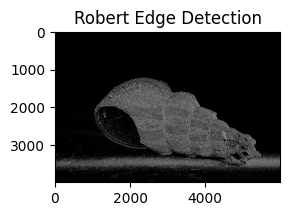

In [ ]:
while True:
    print("Image transformation functions:\n1. Sobel Edge Detection\n2. Prewitt Edge Detection\n3. Robert Edge Detection (with Gaussian Blur)\n4. Laplacian Edge Detection\n5. Canny Edge Detection")
    b = int(input("Select a corresponding function: "))

    if(b==1):
        print("Sobel Edge Detection...")
        sobel_edge_detection(image, name)
        break
    elif(b==2):
        print("Prewitt Edge Detection...")
        prewitt_edge_detection(image, name)
        break
    elif(b==3):
        print("Robert Edge Detection (with Gaussian Blur)...")
        robert_edge_detection(image, name)
        break
    elif(b==4):
        print("Laplacian Edge Detection...")
        laplacian_edge_detection(image, name)
        break
    elif(b==5):
        print("Canny Edge Detection...")
        canny_edge_detection(image, name)
        break
    else:
        print("Fucntion does not exist")